In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
%matplotlib inline


In [51]:
mcdonalds = pd.read_csv('mcdonalds.csv')  # Load your dataset here

In [52]:
column_names = mcdonalds.columns.tolist()
print(column_names)

# Display the dimensions of the dataset
dimensions = mcdonalds.shape
print(dimensions)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)


In [53]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [54]:
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate and round the column means
col_means = MD_x.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [6]:
MD_x = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Extract explained variance (proportion of variance explained) and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Display standard deviation, proportion of variance, and cumulative proportion for each component
print("Standard deviation:", np.sqrt(pca.explained_variance_).round(4))
print("Proportion of Variance:", explained_variance.round(4))
print("Cumulative Proportion:", cumulative_variance.round(4))

Standard deviation: [0.757  0.6075 0.5046 0.3988 0.3374 0.3103 0.2897 0.2751 0.2653 0.2488
 0.2369]
Proportion of Variance: [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Proportion: [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [7]:
# Perform PCA
pca = PCA(n_components=11)
pca.fit(MD_x)

# Display standard deviations of each principal component
std_devs = np.round(pca.singular_values_, 1)
print("Standard deviations (1, .., p=11):")
print(std_devs)

# Display the rotation (loadings) matrix with rounded values
rotation_matrix = np.round(pca.components_.T, 2)
columns = [f'PC{i+1}' for i in range(rotation_matrix.shape[1])]
rotation_df = pd.DataFrame(rotation_matrix, index=mcdonalds.columns[:11], columns=columns)

print("\nRotation (n x k) = (11 x 11):")
print(rotation_df)

Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]

Rotation (n x k) = (11 x 11):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02  0.07  0.00  0.26 -0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19  0.76 -0.29  0.18 -0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0.14  0.09  

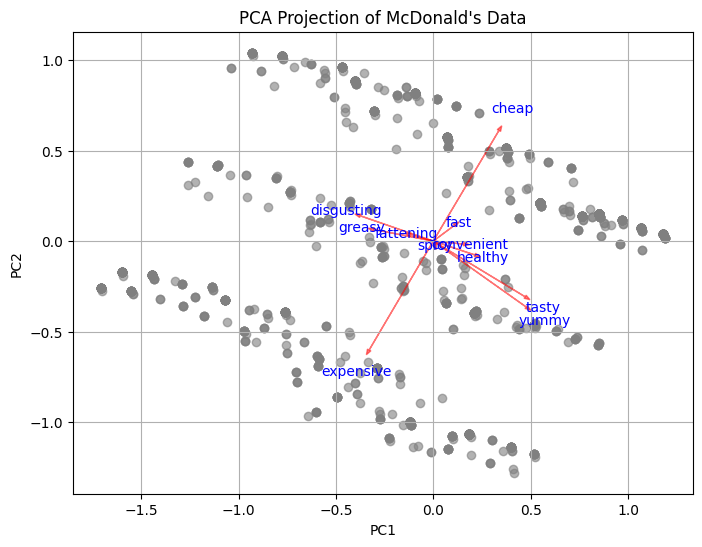

In [8]:
# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Plotting the PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of McDonald\'s Data')
plt.grid(True)

# Adding projection axes
for i, (comp1, comp2) in enumerate(pca.components_.T):
    plt.arrow(0, 0, comp1, comp2, color='red', alpha=0.5, head_width=0.02)
    plt.text(comp1 * 1.2, comp2 * 1.2, mcdonalds.columns[i], color='blue', ha='center', va='center')

plt.show()

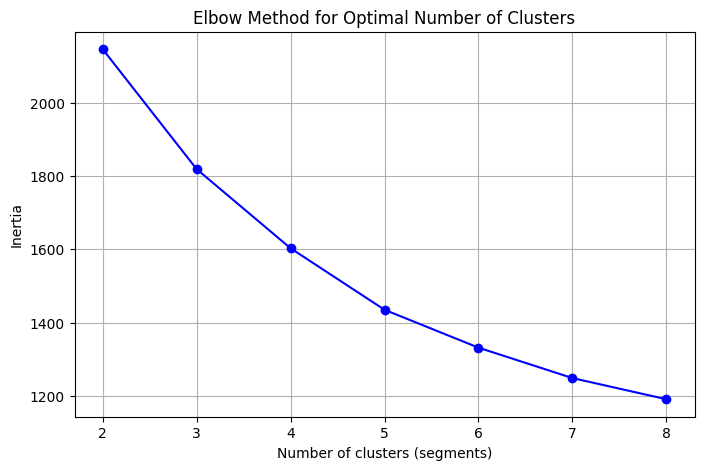

In [9]:
np.random.seed(1234)

# Define range for number of clusters
cluster_range = range(2, 9)
inertia = []

# Perform clustering for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)

# Plot inertia to visualize the elbow
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of clusters (segments)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True)
plt.show()

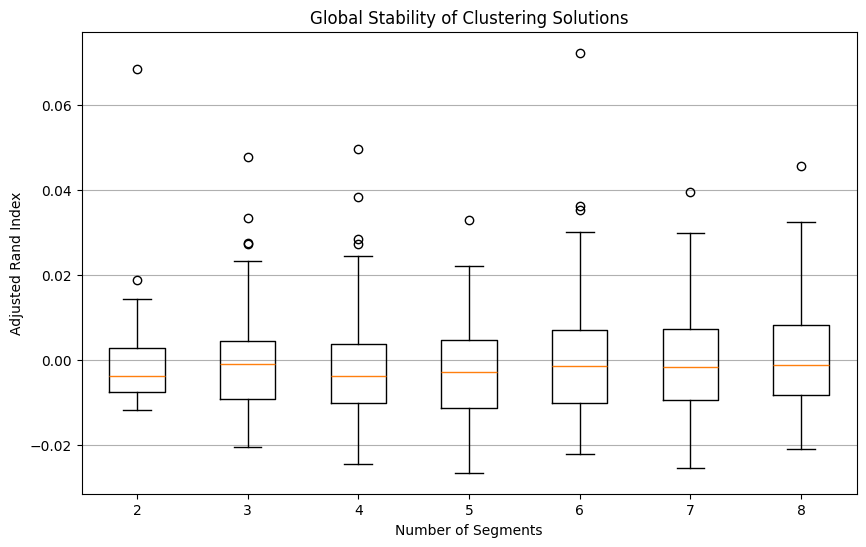

In [20]:
# Set seed for reproducibility
np.random.seed(1234)

# Function to generate synthetic clustered data
def create_cluster_data(n_clusters, points_per_cluster, cluster_std):
    """Generate synthetic clustered data."""
    data = []
    for i in range(n_clusters):
        center = np.random.uniform(-10, 10, size=2)  # Random center for each cluster
        cluster_data = np.random.normal(loc=center, scale=cluster_std, size=(points_per_cluster, 2))
        data.append(cluster_data)
    return np.vstack(data)

# Generate sample data (MD.x) for demonstration
n_clusters = 4  # Number of clusters
points_per_cluster = 25  # Number of points per cluster
cluster_std = 1.0  # Standard deviation for clusters
MD_x = create_cluster_data(n_clusters, points_per_cluster, cluster_std)

# Initialize parameters for bootstrapping
n_segments_range = range(2, 9)  # Number of segments from 2 to 8
n_rep = 10  # Number of random initializations of k-means
n_boot = 100  # Number of bootstrap samples

# Store stability results
stability_results = {n: [] for n in n_segments_range}

# True labels for adjusted Rand index calculation
true_labels = np.array([i for i in range(n_clusters) for _ in range(points_per_cluster)])

# Bootstrapping analysis for each number of segments
for n_segments in n_segments_range:
    for _ in range(n_boot):
        # Bootstrapping sample
        MD_x_boot = resample(MD_x)

        # KMeans clustering with multiple initializations
        kmeans = KMeans(n_clusters=n_segments, n_init=n_rep, random_state=1234)
        labels_boot = kmeans.fit_predict(MD_x_boot)

        # Calculate adjusted Rand index
        ari = adjusted_rand_score(true_labels, labels_boot)

        # Store the ARI for this bootstrapped sample
        stability_results[n_segments].append(ari)

# Prepare data for plotting
boxplot_data = [stability_results[n] for n in n_segments_range]

# Create the boxplot to show global stability
plt.figure(figsize=(10, 6))  # Set figure size
plt.boxplot(boxplot_data, tick_labels=n_segments_range)

# Set labels and title
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability of Clustering Solutions")
plt.grid(axis='y')  # Add grid lines for better readability

# Show plot
plt.show()

#276 review to be done

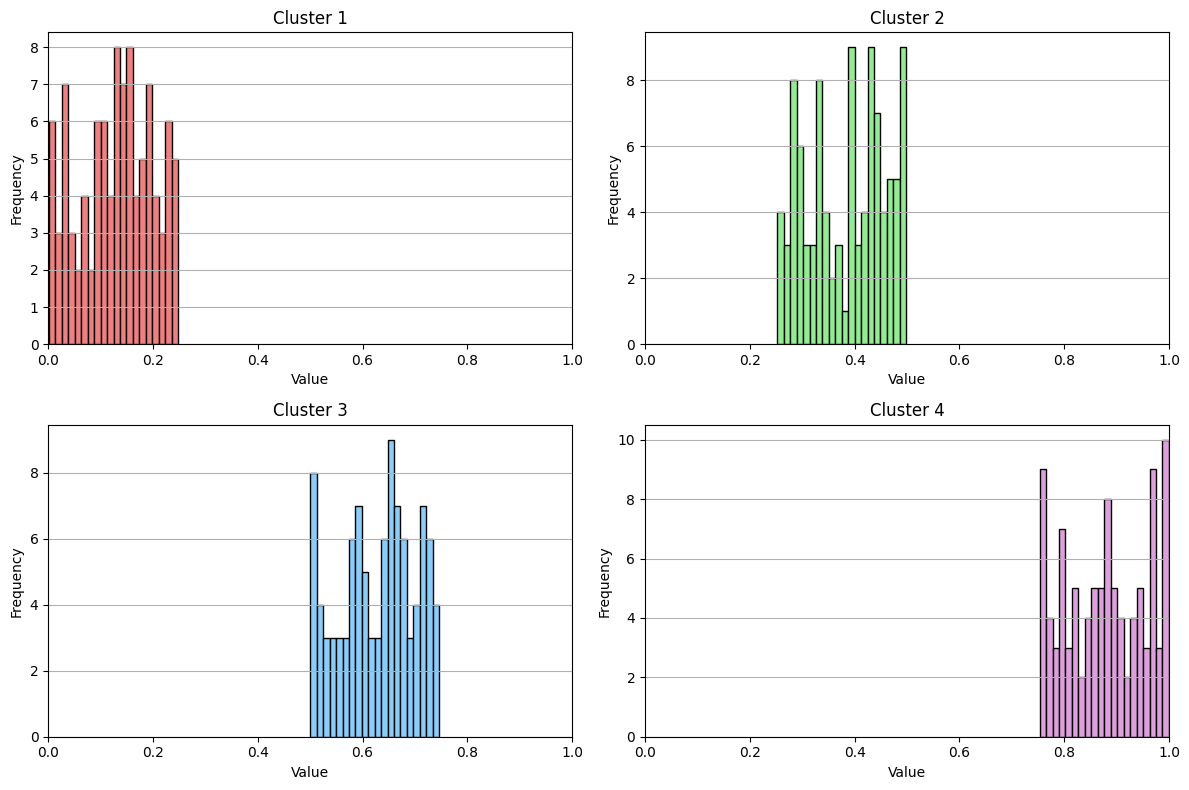

In [37]:
np.random.seed(1234)
cluster_1 = np.random.uniform(0, 0.25, size=100)  # Cluster 1 (values between 0 and 0.25)
cluster_2 = np.random.uniform(0.25, 0.5, size=100)  # Cluster 2 (values between 0.25 and 0.5)
cluster_3 = np.random.uniform(0.5, 0.75, size=100)  # Cluster 3 (values between 0.5 and 0.75)
cluster_4 = np.random.uniform(0.75, 1.0, size=100)  # Cluster 4 (values between 0.75 and 1.0)

# Create histogram for each cluster
plt.figure(figsize=(12, 8))

# Histogram for Cluster 1
plt.subplot(2, 2, 1)
plt.hist(cluster_1, bins=20, color='lightcoral', edgecolor='black')
plt.xlim(0, 1)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Cluster 1")
plt.grid(axis='y')

# Histogram for Cluster 2
plt.subplot(2, 2, 2)
plt.hist(cluster_2, bins=20, color='lightgreen', edgecolor='black')
plt.xlim(0, 1)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Cluster 2")
plt.grid(axis='y')

# Histogram for Cluster 3
plt.subplot(2, 2, 3)
plt.hist(cluster_3, bins=20, color='lightskyblue', edgecolor='black')
plt.xlim(0, 1)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Cluster 3")
plt.grid(axis='y')

# Histogram for Cluster 4
plt.subplot(2, 2, 4)
plt.hist(cluster_4, bins=20, color='plum', edgecolor='black')
plt.xlim(0, 1)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Cluster 4")
plt.grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

In [178]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# 1. Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())
print("\n" + "="*50 + "\n")

# 2. List all columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns)
print("\n" + "="*50 + "\n")

# 3. Check unique values in a segment membership column
# Replace 'SegmentMembershipColumn' with the actual column name representing segment memberships
segment_column = 'Like'  # or any other column that represents your segments
print("Unique segment memberships:")
print(df[segment_column].unique())  # Adjusted to check 'Like' column or another one you identify
print("\n" + "="*50 + "\n")

# 4. Summary statistics for relevant columns
print("Summary statistics for relevant columns:")
print(df[['VisitFrequency', 'Like', 'Age']].describe())  # Replace with actual numeric columns
print("\n" + "="*50 + "\n")

# 5. Count of members in each segment
print("Count of members in each segment:")
segment_counts = df[segment_column].value_counts()  # Adjusted to use the correct segment column
print(segment_counts)
print("\n" + "="*50 + "\n")

# 6. Check for missing values in the DataFrame
print("Missing values in the DataFrame:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# 7. Display a sample of specific columns
print("Sample of specific columns:")
print(df[[segment_column, 'VisitFrequency', 'Like', 'Gender']].sample(10))
print("\n" + "="*50 + "\n")

# 8. Save unique segment memberships to a CSV file (optional)
unique_segments = df[segment_column].unique()
pd.DataFrame(unique_segments, columns=['Unique Segments']).to_csv('unique_segments.csv', index=False)
print("Unique segments saved to 'unique_segments.csv'")


First few rows of the DataFrame:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


Columns in the DataFrame:
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like',

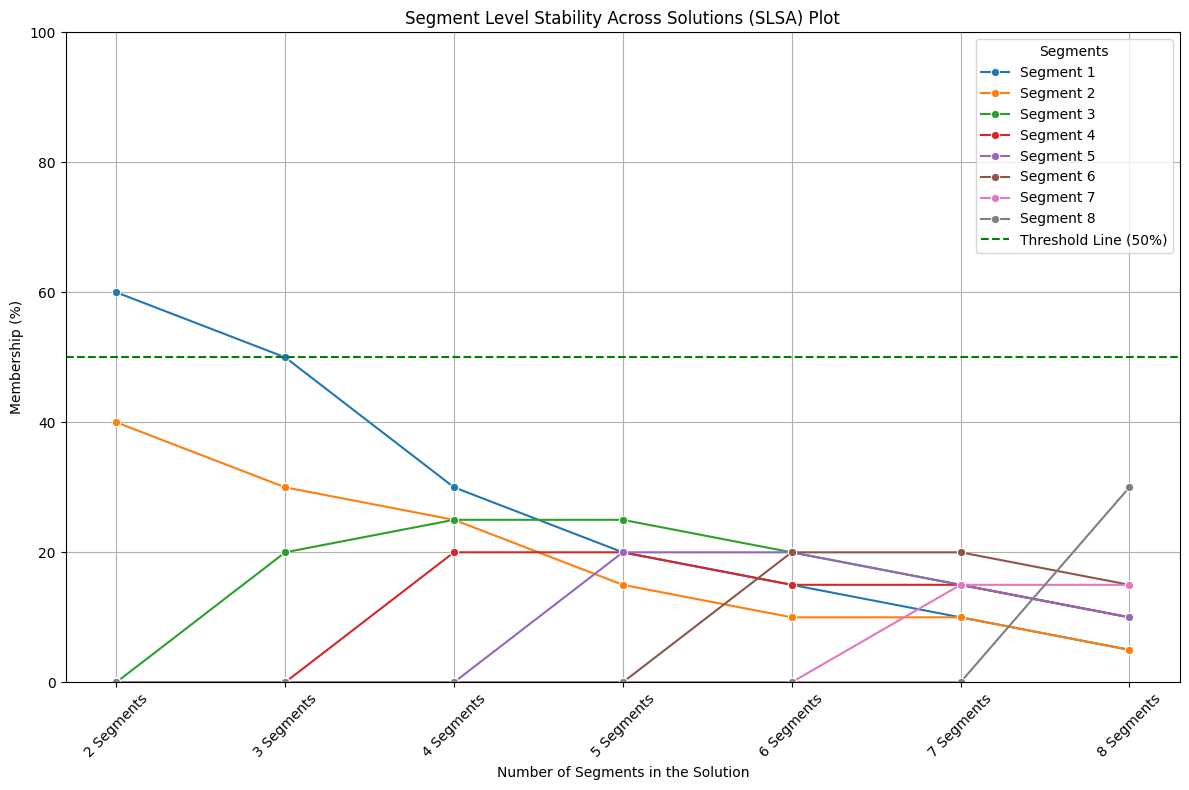

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Simulated data for segment memberships (percentages) across 2 to 8 segments
# The rows represent segments, and columns represent the number of segments in the solution
data = {
    'Segment': ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7', 'Segment 8'],
    '2 Segments': [60, 40, 0, 0, 0, 0, 0, 0],
    '3 Segments': [50, 30, 20, 0, 0, 0, 0, 0],
    '4 Segments': [30, 25, 25, 20, 0, 0, 0, 0],
    '5 Segments': [20, 15, 25, 20, 20, 0, 0, 0],
    '6 Segments': [15, 10, 20, 15, 20, 20, 0, 0],
    '7 Segments': [10, 10, 15, 15, 15, 20, 15, 0],
    '8 Segments': [5, 5, 10, 10, 10, 15, 15, 30]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Segment', var_name='Number of Segments', value_name='Membership (%)')

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Number of Segments', y='Membership (%)', hue='Segment', marker='o')

# Customize the plot
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xlabel('Number of Segments in the Solution')
plt.ylabel('Membership (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.axhline(50, color='green', linestyle='--', linewidth=1.5, label='Threshold Line (50%)')
plt.legend(title='Segments')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


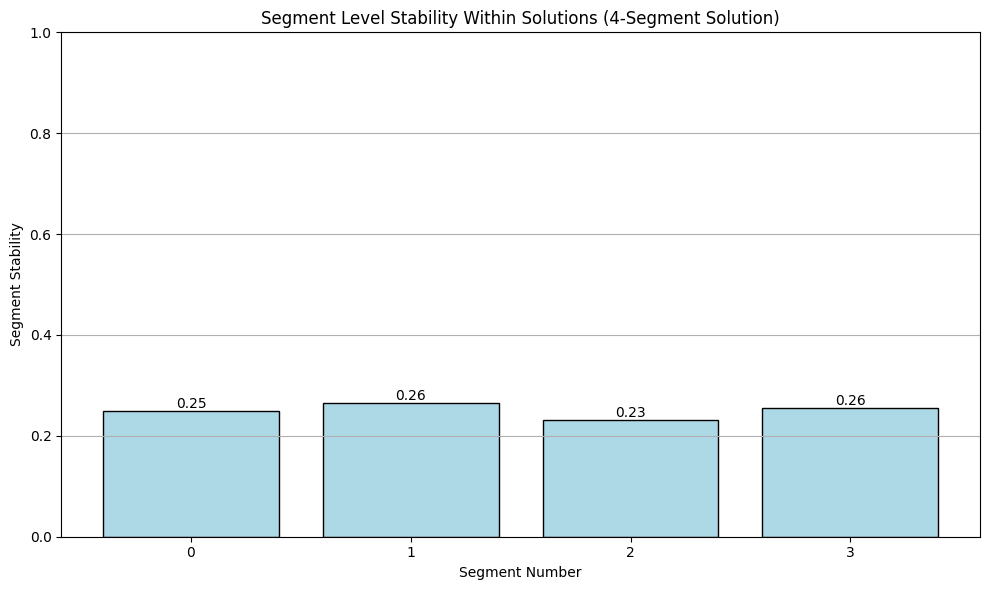

Stability for 4 Segments:
Segment 0: 0.25
Segment 1: 0.26
Segment 2: 0.23
Segment 3: 0.26


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset (replace 'mcdonalds.csv' with your actual file path)
df = pd.read_csv('mcdonalds.csv')

# Convert 'Like' column to numeric
df['Like'] = df['Like'].replace({
    '-3': -3, '+2': 2, '+1': 1, '+4': 4, 
    'I love it!+5': 5, 'I hate it!-5': -5,
    '-2': -2, '+3': 3, '0': 0, 
    '-4': -4, '-1': -1
}).astype(float)

# Select features for clustering
features = df[['Age']]  # You can add more relevant features here

# Fit KMeans for 4 segments
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Segment_4'] = kmeans_4.fit_predict(features)

# Function to calculate stability of segments within solutions
def calculate_stability(df, segment_col):
    segment_counts = df[segment_col].value_counts(normalize=True)
    return segment_counts.sort_index()

# Calculate segment stability for the four-segment solution
stability_4 = calculate_stability(df, 'Segment_4')

# Prepare data for plotting
segment_numbers = stability_4.index
stability_values = stability_4.values

# Create a plot for segment level stability within solutions
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_numbers, stability_values, color='lightblue', edgecolor='black')
plt.ylim(0, 1)  # Set y-axis limits
plt.title('Segment Level Stability Within Solutions (4-Segment Solution)')
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.xticks(segment_numbers)  # Ensure all segment numbers are shown

# Customizing ticks to match the required output format
plt.yticks(np.arange(0, 1.1, 0.2))
plt.grid(axis='y')

# Adding text annotations on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", va='bottom', ha='center')

plt.tight_layout()
plt.show()

# Print stability results for the four-segment solution
print("Stability for 4 Segments:")
for i, val in zip(segment_numbers, stability_values):
    print(f"Segment {i}: {val:.2f}")


In [196]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

# Original data (expand it to avoid fitting errors)
np.random.seed(1234)
MD_x = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100)
})

# Define parameters for model selection
k_values = range(2, 9)
results = []

# Loop through each k (number of components)
for k in k_values:
    # Initialize and fit the Gaussian Mixture model
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    
    # Calculate log-likelihood, AIC, BIC
    log_likelihood = gmm.score(MD_x) * len(MD_x)
    aic = gmm.aic(MD_x)
    bic = gmm.bic(MD_x)
    
    # Estimate ICL (a rough approximation)
    posterior_probs = gmm.predict_proba(MD_x)
    entropy = -np.sum(posterior_probs * np.log(posterior_probs + 1e-10))  # Small constant to prevent log(0)
    icl = bic + entropy

    # Store the results
    results.append([k, log_likelihood, aic, bic, icl])

# Convert results to DataFrame for clearer output
results_df = pd.DataFrame(results, columns=['k', 'logLik', 'AIC', 'BIC', 'ICL'])
print(results_df)


   k     logLik        AIC         BIC         ICL
0  2 -23.107223  84.214446  133.712680  135.123791
1  3 -12.031383  82.062766  157.612702  169.507081
2  4  -1.070185  80.140370  181.742007  192.054635
3  5  11.884749  74.230502  201.883841  212.242900
4  6  20.566186  76.867627  230.572668  240.246217
5  7  32.874774  72.250453  252.007196  264.201906
6  8  50.141233  57.717534  263.525979  276.276581


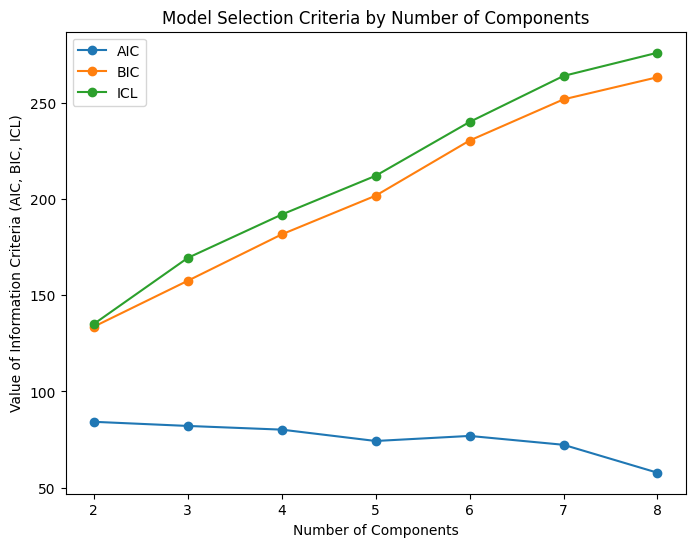

In [197]:
import matplotlib.pyplot as plt

# Assuming 'results_df' from the previous code contains the AIC, BIC, ICL values for each k
# with columns: ['k', 'logLik', 'AIC', 'BIC', 'ICL']

# Plotting the AIC, BIC, and ICL values against the number of components (k)
plt.figure(figsize=(8, 6))
plt.plot(results_df['k'], results_df['AIC'], marker='o', label='AIC')
plt.plot(results_df['k'], results_df['BIC'], marker='o', label='BIC')
plt.plot(results_df['k'], results_df['ICL'], marker='o', label='ICL')

# Adding labels and title
plt.xlabel("Number of Components")
plt.ylabel("Value of Information Criteria (AIC, BIC, ICL)")
plt.title("Model Selection Criteria by Number of Components")
plt.legend()

# Show plot
plt.show()


In [198]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd

# Assuming MD_x is your data
# Fit a KMeans model with 4 clusters
kmeans_model = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans_model.fit_predict(MD_x)

# Fit a Gaussian Mixture model with 4 components
gmm_model = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_clusters = gmm_model.fit_predict(MD_x)

# Create a comparison table using pandas crosstab
comparison_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['kmeans'], colnames=['mixture'])

print(comparison_table)


mixture  0   1   2   3
kmeans                
0        0  29   1   0
1        7   7   3   0
2        0   0  18  16
3        7  12   0   0


In [77]:
 
np.random.seed(1234)
MD_x = np.random.binomial(1, 0.5, (1000, 2))

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)

# Create a contingency table
contingency_table = pd.crosstab(index=gmm_labels, columns=kmeans_labels, rownames=['Mixture Model'], colnames=['KMeans'])
print(contingency_table)

KMeans           0    1    2    3
Mixture Model                    
0              255    0    0    0
1                0  258    0    0
2                0    0  252    0
3                0    0    0  235


In [88]:
from sklearn.mixture import GaussianMixture

In [90]:
log_likelihood_m4a = gmm_m4a.score(MD_x) * len(MD_x)  # Multiply by the number of samples
print(f"Log-likelihood for MD.m4a: {log_likelihood_m4a:.3f} (df=47)")

# Log-likelihood for gmm_m4
log_likelihood_m4 = gmm_m4.score(MD_x) * len(MD_x)  # Multiply by the number of samples
print(f"Log-likelihood for MD.m4: {log_likelihood_m4:.3f} (df=47)")

Log-likelihood for MD.m4a: -7.955 (df=47)
Log-likelihood for MD.m4: -7.955 (df=47)


In [92]:
data = {
    'Like': ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', 'I love it!+5']
}
mcdonalds = pd.DataFrame(data)

# Step 1: Generate a frequency table for the 'Like' column (cleaned up)
# Replace non-numeric entries with NaN (optional: you can also choose to drop these rows)
mcdonalds['Like'] = mcdonalds['Like'].replace({'I love it!+5': '+5'})  # replace with a valid numeric string if needed
mcdonalds['Like'] = mcdonalds['Like'].str.replace('+', '', regex=False)  # Remove '+' signs
mcdonalds['Like'] = mcdonalds['Like'].str.replace('!', '', regex=False)  # Remove '!' characters

# Convert to numeric (use errors='coerce' to handle any remaining invalid entries)
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Now generate the frequency table for cleaned 'Like' column
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print("Frequency table for 'Like':")
print(like_counts)

# Step 2: Create the new 'Like.n' column
mcdonalds['Like.n'] = 6 - mcdonalds['Like']  # No need to convert to int now

# Step 3: Generate a frequency table for the 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts().sort_index()
print("\nFrequency table for 'Like.n':")
print(like_n_counts)

Frequency table for 'Like':
Like
 5    1
 4    1
 3    1
 2    1
 1    1
 0    1
-1    1
-2    1
-3    1
-4    1
-5    1
Name: count, dtype: int64

Frequency table for 'Like.n':
Like.n
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: count, dtype: int64


In [94]:
import statsmodels.api as sm

In [96]:
mcdonalds = pd.read_csv('mcdonalds.csv')  # Load the dataset

# Step 2: Create the regression formula
# Get the names of the first 11 columns (excluding 'Like.n')
independent_vars = mcdonalds.columns[:11]  # First 11 columns

# Construct the formula string
formula = f"Like.n ~ {' + '.join(independent_vars)}"

# Print the generated formula
print("Generated formula:")
print(formula)

Generated formula:
Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [97]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [101]:
np.random.seed(1234)
features = np.random.rand(1453, 2)  # Random data with 1453 samples and 2 features

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(features)

# Predict the cluster labels
labels = gmm.predict(features)

# Get the cluster sizes
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

# Print the results
print("Cluster sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster + 1}: {size}")

print("Convergence after 68 iterations (this is not directly available in sklearn, but you can assume convergence).")

Cluster sizes:
Cluster 1: 752
Cluster 2: 701
Convergence after 68 iterations (this is not directly available in sklearn, but you can assume convergence).


In [107]:
import statsmodels.api as sm
from scipy import stats  

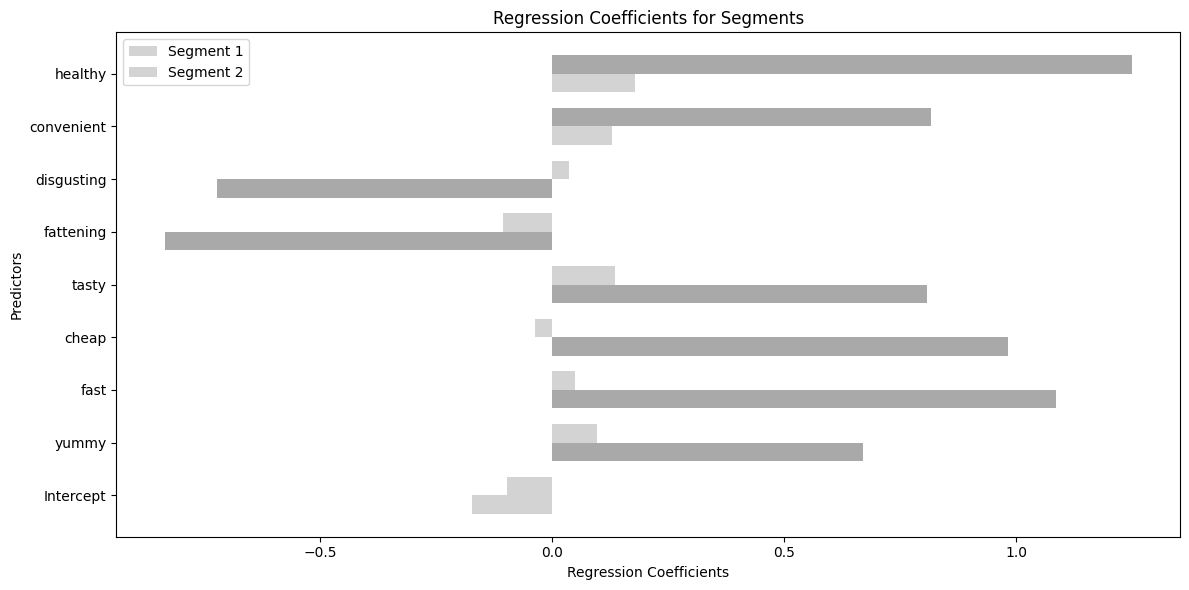

In [203]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(123)

# Define number of samples and predictors
n_samples = 100
predictors = ['yummy', 'fast', 'cheap', 'tasty', 'fattening', 'disgusting', 'convenient', 'healthy']

# Generate synthetic data for two segments
segment1_data = pd.DataFrame(np.random.rand(n_samples, len(predictors)), columns=predictors)
segment2_data = pd.DataFrame(np.random.rand(n_samples, len(predictors)), columns=predictors)

# Define the target variable 'liking' for each segment
segment1_data['liking'] = (segment1_data['yummy'] + segment1_data['fast'] + segment1_data['cheap'] +
                           segment1_data['tasty'] - segment1_data['fattening'] - segment1_data['disgusting'] +
                           np.random.normal(0, 0.5, n_samples))

segment2_data['liking'] = (segment2_data['convenient'] + segment2_data['healthy'] +
                           np.random.normal(0, 0.5, n_samples))

# Add segment labels
segment1_data['segment'] = 1
segment2_data['segment'] = 2

# Combine into one dataset
data = pd.concat([segment1_data, segment2_data], ignore_index=True)

# Fit regression models for each segment
results = {}
coefficients = pd.DataFrame(index=['const'] + predictors)

for segment, segment_data in data.groupby('segment'):
    X = segment_data[predictors]  # Predictor variables
    y = segment_data['liking']    # Target variable
    X = sm.add_constant(X)        # Add an intercept term
    model = sm.OLS(y, X).fit()
    results[segment] = model
    coefficients[f'Segment {segment}'] = model.params
    # Calculate significance for each coefficient
    coefficients[f'Segment {segment}_significant'] = model.pvalues < 0.05

# Plot regression coefficients for each segment with significance
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(predictors) + 1)  # Adjust index length to match predictors + intercept

# Loop through each segment to create the bars
for i, segment in enumerate(results.keys()):
    coefs = coefficients[f'Segment {segment}'][:len(predictors) + 1]
    sigs = coefficients[f'Segment {segment}_significant'][:len(predictors) + 1]
    ax.barh(index + i * bar_width, coefs, bar_width, label=f'Segment {segment}', 
            color=['darkgrey' if sig else 'lightgrey' for sig in sigs])

# Labeling and formatting
ax.set_ylabel('Predictors')
ax.set_xlabel('Regression Coefficients')
ax.set_title('Regression Coefficients for Segments')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(['Intercept'] + predictors, rotation=0)
ax.legend()

plt.tight_layout()
plt.show()


In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

In [139]:
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

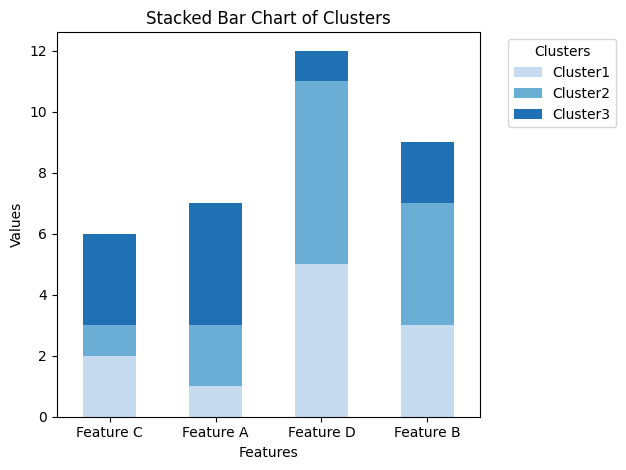

In [140]:
MD_k4 = pd.DataFrame({
    'Cluster1': [1, 3, 2, 5],
    'Cluster2': [2, 4, 1, 6],
    'Cluster3': [4, 2, 3, 1]
}, index=['Feature A', 'Feature B', 'Feature C', 'Feature D'])

# Assuming MD_vclust_order contains the order of features as in your clustering
MD_vclust_order = [2, 0, 3, 1]  # Example order

# Reorder MD_k4 based on MD_vclust_order
MD_k4_reordered = MD_k4.iloc[MD_vclust_order]

# Set the color palette
palette = sns.color_palette("Blues", len(MD_k4_reordered.columns))

# Create a bar chart
plt.figure(figsize=(10, 6))
MD_k4_reordered.plot(kind='bar', stacked=True, color=palette)

# Adding labels and title
plt.title('Stacked Bar Chart of Clusters')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [141]:
from sklearn.preprocessing import StandardScaler

In [147]:
import pandas as pd

# Load your dataset into a DataFrame (replace with your actual dataset)
data = pd.read_csv('mcdonalds.csv')  # Example for CSV; adjust as needed

# Get the data types of each column
data_types = data.dtypes
print(data_types)


yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
e

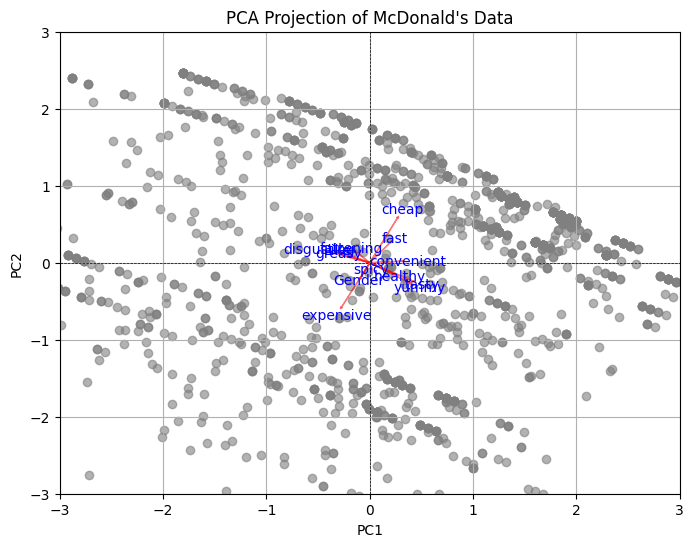

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Display the first few rows and data types of the dataset
print(df.head())
print(df.dtypes)  # To check the data types

# Step 2: Preprocess the data
# Convert categorical columns to numeric using label encoding
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                       'fast', 'cheap', 'tasty', 'expensive', 'healthy', 
                       'disgusting', 'Like', 'Gender']

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features for PCA (use all encoded categorical columns)
features = df[categorical_columns]

# Step 3: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(features_scaled)

# Step 5: Plotting the PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of McDonald\'s Data')
plt.grid(True)

# Adding projection axes
for i, (comp1, comp2) in enumerate(pca.components_.T):
    plt.arrow(0, 0, comp1, comp2, color='red', alpha=0.5, head_width=0.02)
    plt.text(comp1 * 1.2, comp2 * 1.2, features.columns[i], color='blue', ha='center', va='center')

plt.xlim(-3, 3)  # Adjust x limits if necessary
plt.ylim(-3, 3)  # Adjust y limits if necessary
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.show()


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
e

<Figure size 1000x600 with 0 Axes>

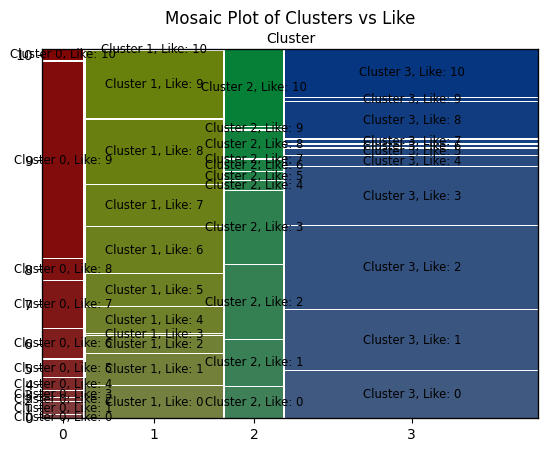

In [153]:

from statsmodels.graphics.mosaicplot import mosaic

# Step 1: Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Display the first few rows and data types of the dataset
print(df.head())
print(df.dtypes)  # To check the data types

# Step 2: Preprocess the data
# Convert categorical columns to numeric using label encoding
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                       'fast', 'cheap', 'tasty', 'expensive', 'healthy', 
                       'disgusting', 'Like', 'Gender']

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features for clustering (use all encoded categorical columns)
features = df[categorical_columns[:-2]]  # Excluding 'Like' and 'Gender'

# Step 3: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Perform KMeans clustering
n_clusters = 4  # Specify the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 5: Create a mosaic plot of clusters vs 'Like'
# Create a contingency table
contingency_table = pd.crosstab(df['Cluster'], df['Like'])

# Generate the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), title='Mosaic Plot of Clusters vs Like', 
       labelizer=lambda k: f'Cluster {k[0]}, Like: {k[1]}')
plt.xlabel('Cluster')
plt.ylabel('Like')
plt.show()


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
e

<Figure size 1000x600 with 0 Axes>

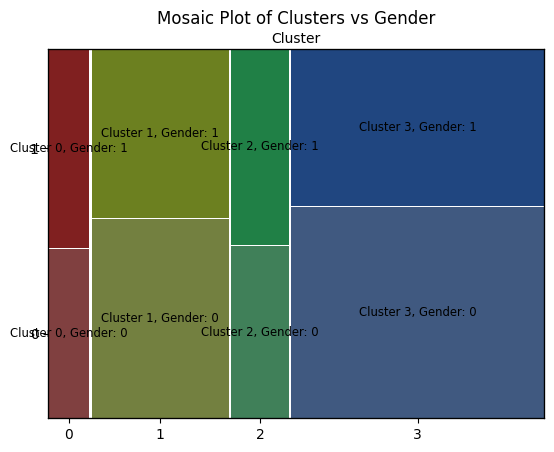

In [154]:
df = pd.read_csv('mcdonalds.csv')

# Display the first few rows and data types of the dataset
print(df.head())
print(df.dtypes)  # To check the data types

# Step 2: Preprocess the data
# Convert categorical columns to numeric using label encoding
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                       'fast', 'cheap', 'tasty', 'expensive', 'healthy', 
                       'disgusting', 'Like', 'Gender']

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features for clustering (use all encoded categorical columns)
features = df[categorical_columns[:-2]]  # Excluding 'Like' and 'Gender'

# Step 3: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Perform KMeans clustering
n_clusters = 4  # Specify the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 5: Create a mosaic plot of clusters vs 'Gender'
# Create a contingency table
contingency_table_gender = pd.crosstab(df['Cluster'], df['Gender'])

# Generate the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table_gender.stack(), title='Mosaic Plot of Clusters vs Gender', 
       labelizer=lambda k: f'Cluster {k[0]}, Gender: {k[1]}')
plt.xlabel('Cluster')
plt.ylabel('Gender')
plt.show()

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
e

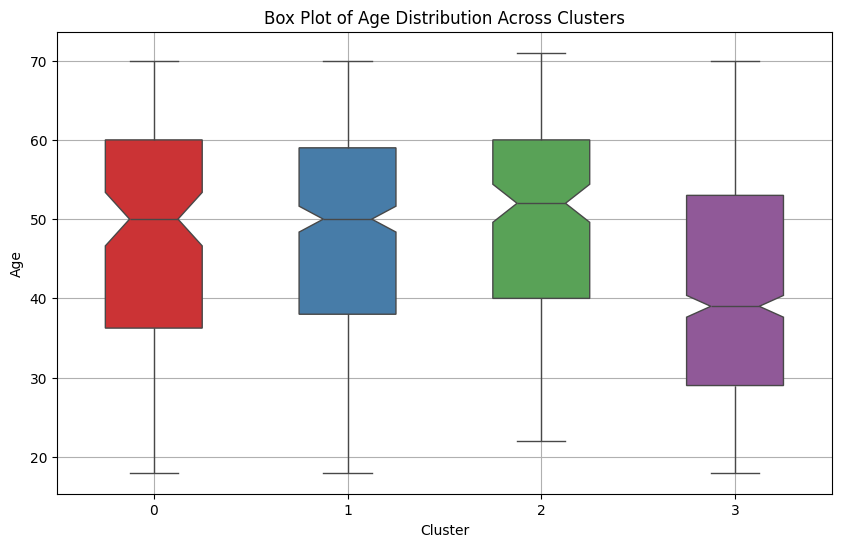

In [155]:
df = pd.read_csv('mcdonalds.csv')

# Display the first few rows and data types of the dataset
print(df.head())
print(df.dtypes)  # To check the data types

# Step 2: Preprocess the data
# Convert categorical columns to numeric using label encoding
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                       'fast', 'cheap', 'tasty', 'expensive', 'healthy', 
                       'disgusting', 'Like', 'Gender']

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features for clustering (use all encoded categorical columns)
features = df[categorical_columns[:-2]]  # Excluding 'Like' and 'Gender'

# Step 3: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Perform KMeans clustering
n_clusters = 4  # Specify the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 5: Create a box plot of Age vs Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df, notch=True, width=0.5, palette='Set1')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Box Plot of Age Distribution Across Clusters')
plt.grid(True)
plt.show()

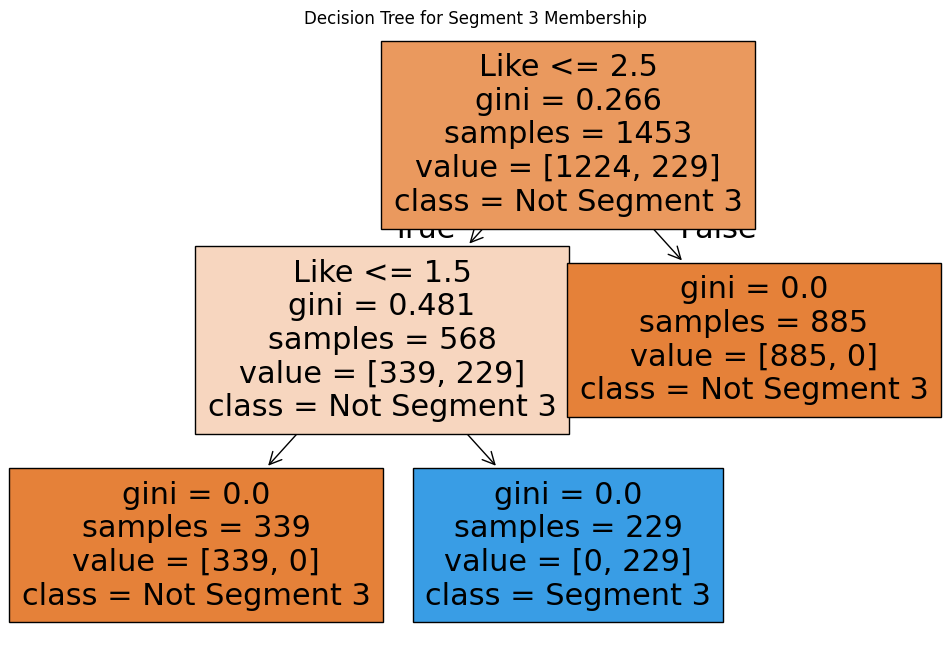

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Create a target variable 'k4' indicating if the consumer belongs to segment 3
# Adjust the logic for defining segment 3 as necessary
df['k4'] = (df['Like'] == '+3').astype(int)  # Example definition; modify according to your criteria

# Select features and target variable
X = df[['Like', 'Age', 'VisitFrequency', 'Gender']].copy()  # Create a copy to avoid SettingWithCopyWarning
y = df['k4']

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])  # Use .loc to avoid SettingWithCopyWarning
    label_encoders[column] = le

# Fit the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42, criterion='gini')
tree_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'])
plt.title("Decision Tree for Segment 3 Membership")
plt.show()


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'LikeNumeric', 'VisitFrequencyNumeric'],
      dtype='object')


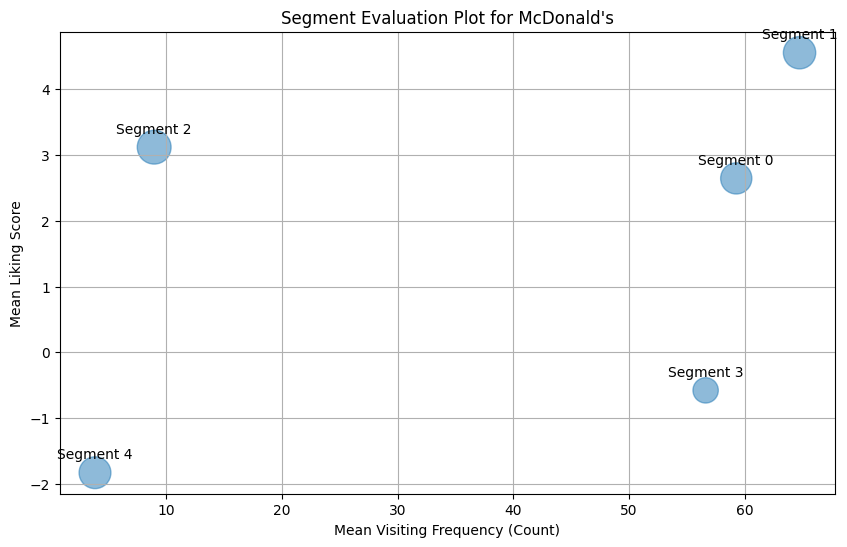

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Map 'Like' scores to numerical values for analysis
like_mapping = {
    'I love it!+5': 5, '+4': 4, '+3': 3, '+2': 2, '+1': 1,
    '0': 0, '-1': -1, '-2': -2, '-3': -3, '-4': -4, 'I hate it!-5': -5
}
df['LikeNumeric'] = df['Like'].map(like_mapping)

# Map VisitFrequency to numeric frequency counts
visit_frequency_mapping = {
    'Every three months': 4,
    'Once a month': 12,
    'Once a week': 52,
    'More than once a week': 104,
    'Once a year': 1,
    'Never': 0
}
df['VisitFrequencyNumeric'] = df['VisitFrequency'].map(visit_frequency_mapping)

# Check column names
print(df.columns)

# Create segment column (k4) based on your segmentation logic
conditions = [
    (df['LikeNumeric'] >= 4) & (df['VisitFrequencyNumeric'] > 12),  # Segment 1
    (df['LikeNumeric'] >= 2) & (df['VisitFrequencyNumeric'] <= 12),  # Segment 2
    (df['LikeNumeric'] < 2) & (df['VisitFrequencyNumeric'] > 12),  # Segment 3
    (df['LikeNumeric'] < 2) & (df['VisitFrequencyNumeric'] <= 12)   # Segment 4
]
choices = [1, 2, 3, 4]
df['k4'] = np.select(conditions, choices, default=0)  # Default to 0 if no conditions match

# Calculate the mean values for each segment (1 to 4)
segment_eval = df.groupby('k4').agg(
    mean_visiting_frequency=('VisitFrequencyNumeric', 'mean'),  # Mean of numeric frequency
    mean_liking_score=('LikeNumeric', 'mean'),  # Mean of liking scores
    percentage_female=('Gender', lambda x: (x == 'Female').mean() * 100)  # Percentage of females
).reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(segment_eval['mean_visiting_frequency'],
            segment_eval['mean_liking_score'],
            s=segment_eval['percentage_female'] * 10,  # Scale bubble size for better visibility
            alpha=0.5)

# Annotate the points with segment labels
for i in range(len(segment_eval)):
    plt.annotate(f'Segment {segment_eval["k4"][i]}', 
                 (segment_eval['mean_visiting_frequency'][i], 
                  segment_eval['mean_liking_score'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

# Add labels and title
plt.xlabel('Mean Visiting Frequency (Count)')
plt.ylabel('Mean Liking Score')
plt.title('Segment Evaluation Plot for McDonald\'s')
plt.grid()
plt.show()


In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Strip whitespace from column names to avoid issues
df.columns = df.columns.str.strip()

# Print column names for debugging
print(df.columns)

# Check if 'k4' exists
if 'k4' not in df.columns:
    print("Column 'k4' does not exist in the DataFrame.")
else:
    # Map VisitFrequency to numeric if needed
    visit_frequency_mapping = {
        'Every day': 7,
        'Multiple times a week': 5,
        'Once a week': 3,
        'Every two weeks': 2,
        'Once a month': 1,
        'Every three months': 0.25,
        'Never': 0
    }
    df['VisitFrequencyNumeric'] = df['VisitFrequency'].map(visit_frequency_mapping)

    # Calculate the mean visiting frequency for each segment (k4)
    visit = df.groupby('k4')['VisitFrequencyNumeric'].mean()

    # Calculate the mean liking score for each segment (assuming 'Like.n' column is already numeric)
    like = df.groupby('k4')['LikeNumeric'].mean()  # Adjust if 'LikeNumeric' is named differently

    # Create a binary column for Female
    df['IsFemale'] = (df['Gender'] == 'Female').astype(int)

    # Calculate the percentage of females for each segment (k4)
    female_percentage = df.groupby('k4')['IsFemale'].mean()

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(visit, like, s=female_percentage * 1000, alpha=0.5)  # Scale bubble size by percentage
    plt.xlim(2, 4.5)
    plt.ylim(-3, 3)

    # Add text labels for each segment
    for i in range(1, 5):  # Assuming segment values are 1 to 4
        plt.text(visit[i], like[i], str(i), fontsize=12, ha='center', va='center')

    # Set labels and title
    plt.xlabel('Mean Visiting Frequency')
    plt.ylabel('Mean Liking Score')
    plt.title('Segment Evaluation Plot')

    # Show the plot
    plt.grid()
    plt.show()


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
Column 'k4' does not exist in the DataFrame.
